In [18]:
import pandas as pd
from pathlib import Path
this_path = Path().resolve()
import numpy as np
data_path = this_path.parent / "data"
assert data_path.exists(), f"Data path {data_path} does not exist."
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv(data_path / "baseline_metadata.csv")
df_test = df[df.filename_index.str.contains("test") | df.filename_index.str.contains("final")]
df_train = df[df.filename_index.str.contains("train")]
len(df_train), len(df_test)

(25863, 10152)

In [31]:
df_test.head()

,filename_index,Habitat,Latitude,Longitude,Substrate,eventDate,taxonID_index
0,fungi_final000000.jpg,Mixed woodland (with coniferous and deciduous ...,54.994548,11.958746,soil,2018-09-01,NaN
1,fungi_final000001.jpg,Unmanaged deciduous woodland,54.673140,11.464060,soil,2013-07-14,NaN
2,fungi_final000002.jpg,Forest bog,56.123620,9.492040,leaf or needle litter,2011-05-29,NaN
3,fungi_final000003.jpg,coniferous woodland/plantation,55.695150,12.338600,soil,2013-11-06,NaN
4,fungi_final000004.jpg,Deciduous woodland,56.148944,9.961819,soil,2020-10-12,NaN


In [32]:
# expand eventDate column into year, month, day
df_test['eventDate'] = pd.to_datetime(df_test['eventDate'], errors='coerce')
df_test['year'] = df_test['eventDate'].dt.year
df_test['month'] = df_test['eventDate'].dt.month
df_test['day'] = df_test['eventDate'].dt.day

/tmp/ipykernel_12413/738121901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['eventDate'] = pd.to_datetime(df_test['eventDate'], errors='coerce')
/tmp/ipykernel_12413/738121901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['year'] = df_test['eventDate'].dt.year
/tmp/ipykernel_12413/738121901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [36]:
df_test['total_days'] = df_test['eventDate'].dt.dayofyear
# normalize
df_test.total_days = df_test.total_days / 365

/tmp/ipykernel_12413/3518037506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['total_days'] = df_test['eventDate'].dt.dayofyear
/tmp/ipykernel_12413/3518037506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.total_days = df_test.total_days / 365


<Axes: >

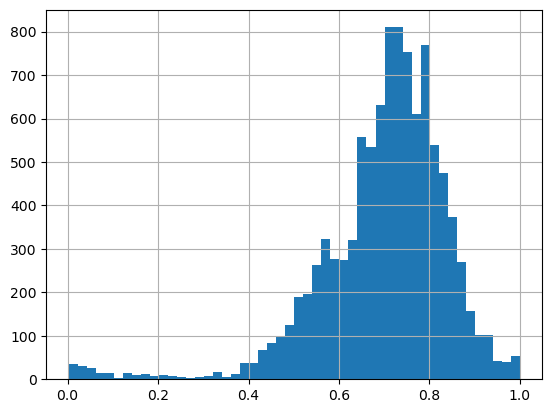

In [37]:
df_test.total_days.hist(bins=50)

<Axes: >

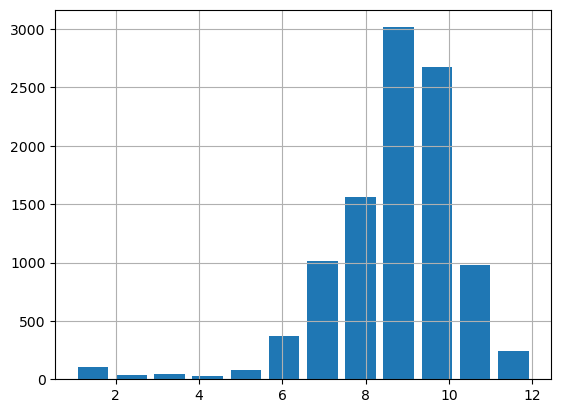

In [26]:
df_test.month.hist(bins=12, rwidth=0.8)

In [38]:
# normalize from 0 to 1 the month
df_test['month'] = df_test['month'] / 12

def encode_cyclical(a: float):
    x = (np.sin(2 * np.pi * a) + 1) / 2
    y = (np.cos(2 * np.pi * a) + 1) / 2
    return x, y

df_test['month_sin'], df_test['month_cos'] = encode_cyclical(df_test['month'])
df_test['total_days_sin'], df_test['total_days_cos'] = encode_cyclical(df_test.total_days)

/tmp/ipykernel_12413/1928304682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['month'] = df_test['month'] / 12
/tmp/ipykernel_12413/1928304682.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['month_sin'], df_test['month_cos'] = encode_cyclical(df_test['month'])
/tmp/ipykernel_12413/1928304682.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

<Axes: >

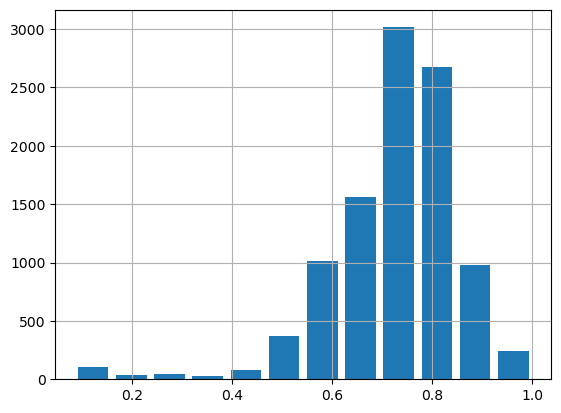

In [28]:
df_test.month.hist(bins=12, rwidth=0.8)

Text(0.5, 1.0, 'Cyclical Encoding of Month')

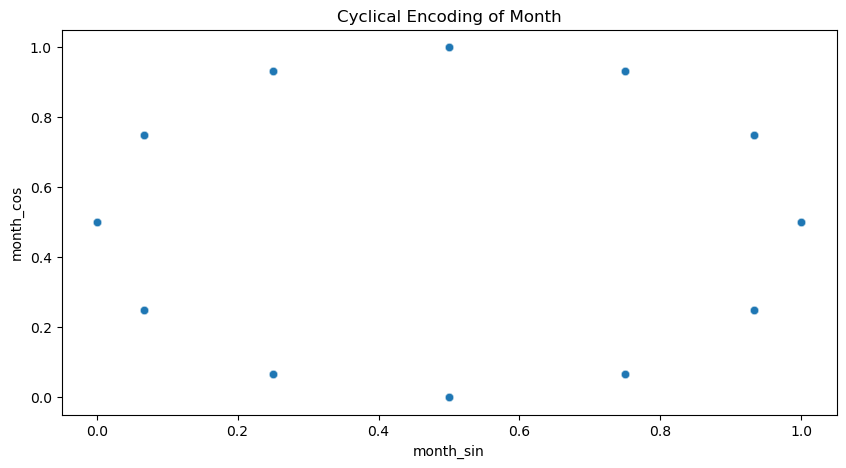

In [39]:
# plot month_sin and month_cos
plt.figure(figsize=(10, 5))
sns.scatterplot(x='month_sin', y='month_cos', data=df_test, alpha=0.5)
plt.title('Cyclical Encoding of Month')

Text(0.5, 1.0, 'Cyclical Encoding of Total Days and Month')

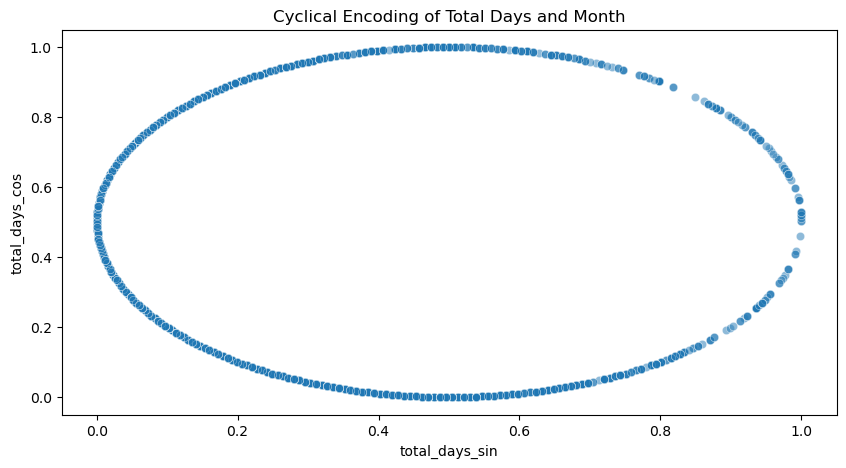

In [40]:
# plot total_days_sin and total_days_cos
plt.figure(figsize=(10, 5))
sns.scatterplot(x='total_days_sin', y='total_days_cos', data=df_test, alpha=0.5)
plt.title('Cyclical Encoding of Total Days and Month')

## Time encoding?
Maybe [sine cosine](https://harrisonpim.com/blog/the-best-way-to-encode-dates-times-and-other-cyclical-features)